Your Name and PRN:
- Name: Snehal Awadan
- PRN : 8033
- Date : 16/05/2024

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
inpDir='../../input'
outDir='../../output'

In [3]:
# some parameters

RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # set randon seed for reproducible results

#para for matplotlib

params = {"legend.fontsize" : "medium",
          "figure.figsize": (15,6),
          "axes.labelsize": "large",
          "axes.titlesize": "large",
          "ytick.labelsize": "large",
          "xtick.labelsize": "large"
         }


In [4]:
plt.rcParams.update(params)

In [5]:
CMAP = plt.cm.coolwarm

In [8]:
df = pd.read_csv("breast_cancer_mod.csv")
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,1,1,0
1,0,1,0,0,0,0,0,0,0,1,...,1,0,1,0,1,1,0,1,1,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
4,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
565,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
566,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
567,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [9]:
# visualization

df["target"].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   mean radius              569 non-null    int64
 1   mean texture             569 non-null    int64
 2   mean perimeter           569 non-null    int64
 3   mean area                569 non-null    int64
 4   mean smoothness          569 non-null    int64
 5   mean compactness         569 non-null    int64
 6   mean concavity           569 non-null    int64
 7   mean concave points      569 non-null    int64
 8   mean symmetry            569 non-null    int64
 9   mean fractal dimension   569 non-null    int64
 10  radius error             569 non-null    int64
 11  texture error            569 non-null    int64
 12  perimeter error          569 non-null    int64
 13  area error               569 non-null    int64
 14  smoothness error         569 non-null    int64
 15  compac

In [11]:
# what labels are present?

df["target"].unique()

array([0, 1], dtype=int64)

<Axes: xlabel='target'>

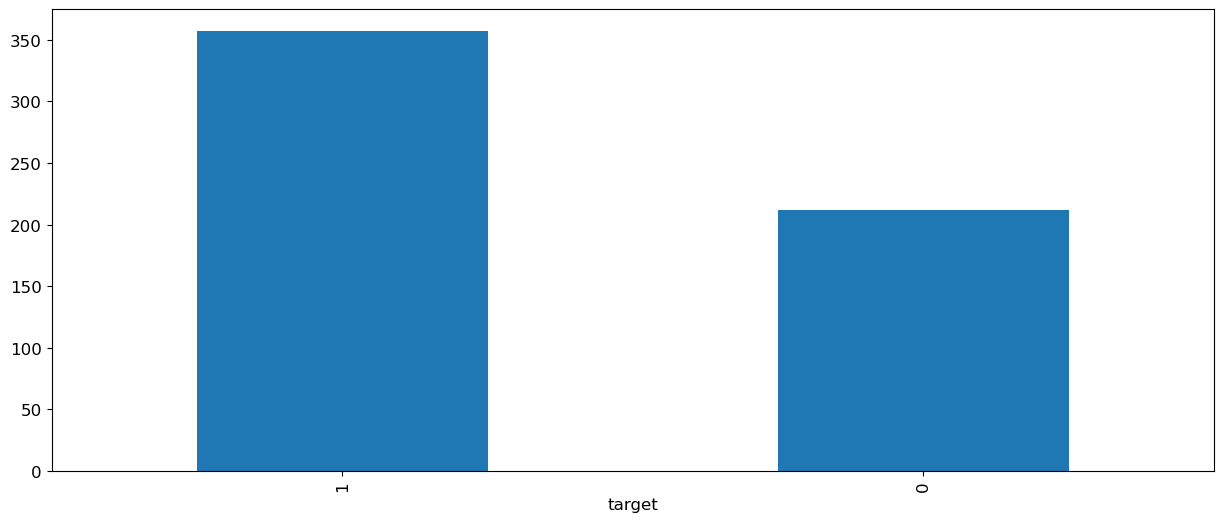

In [12]:
fig, ax = plt.subplots()
df["target"].value_counts().plot(ax = ax, kind = "bar")

In [13]:
# train test 

TEST_SIZE = 0.2
feature_df = df.drop("target", axis = 1)  # df with features
labels = df["target"] # series with target
X_train, X_test, y_train, y_test = train_test_split(feature_df, labels, test_size=TEST_SIZE, stratify = labels, 
                                                    random_state = RANDOM_STATE)

In [14]:
X_train["total"] = X_train.astype(np.int16).sum(axis = 1)
X_train["target"] = y_train

# sort w r t total
X_train.sort_values("total", inplace = True)
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,1,1,12,0
2,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,13,0
1,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,1,0,1,1,13,0
7,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,15,0
6,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,1,15,0


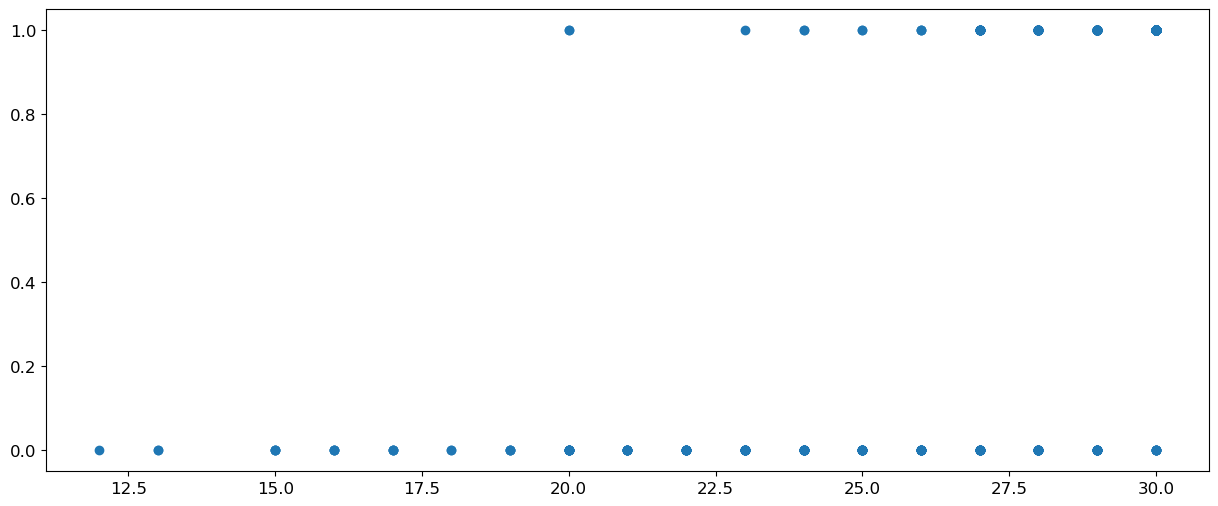

In [15]:
plt.scatter(X_train["total"],X_train["target"])

<Axes: xlabel='total'>

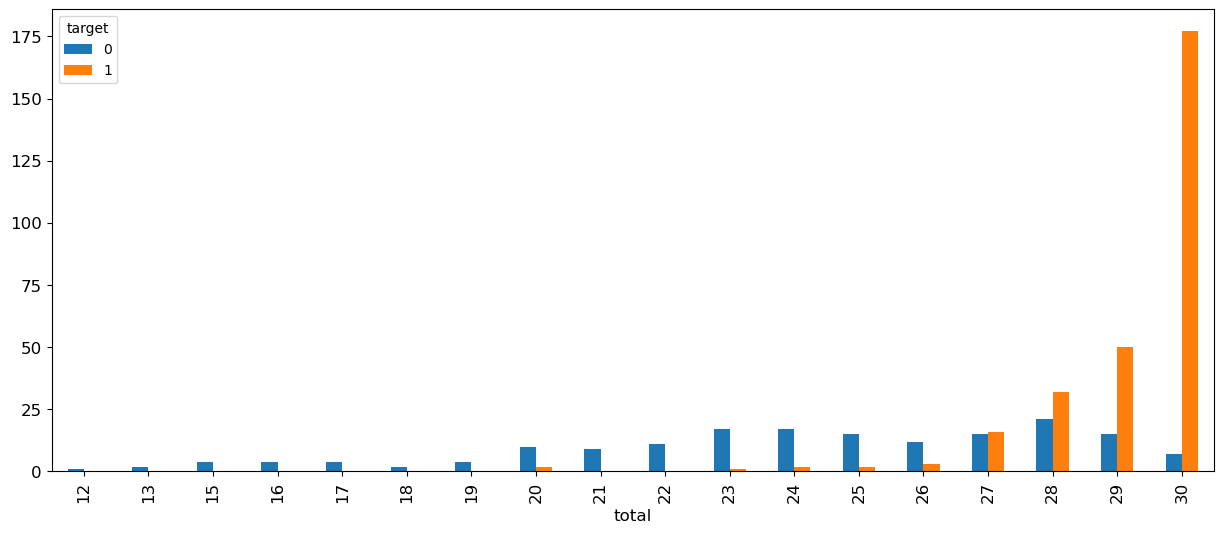

In [16]:
tmp_df=X_train.groupby(["total","target"]).agg({"target":"count"})
tmp_df.columns=["count"]
tmp_df.reset_index(inplace=True)
tmp_df.pivot(index="total",columns="target",values="count").plot(kind="bar")
#tmp_df

In [17]:
accuarcy={}

for b in range(X_train.shape[1]):
    X_train["pred"] = X_train["total"]>=b
    accuarcy[b] = accuracy_score(X_train["target"],X_train["pred"])


In [18]:
# find out the best or max accuracy

b_best = max(accuarcy, key = accuarcy.get)
b_best

27

In [23]:
accuarcy[27]

0.8505494505494505

In [24]:
########## Do same with the test df ##############

In [19]:
X_test["total"] = X_test.astype(np.int16).sum(axis = 1)
X_test["target"] = y_test

# sort w r t total
X_test.sort_values("total", inplace = True)
X_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,14,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,14,0
12,0,1,0,0,0,1,0,0,1,1,...,0,0,1,1,1,0,1,1,16,0
18,0,0,0,1,1,0,0,0,0,1,...,0,1,0,1,1,0,1,1,18,0
35,1,1,1,1,0,0,0,0,0,0,...,0,1,0,1,1,0,1,1,20,0


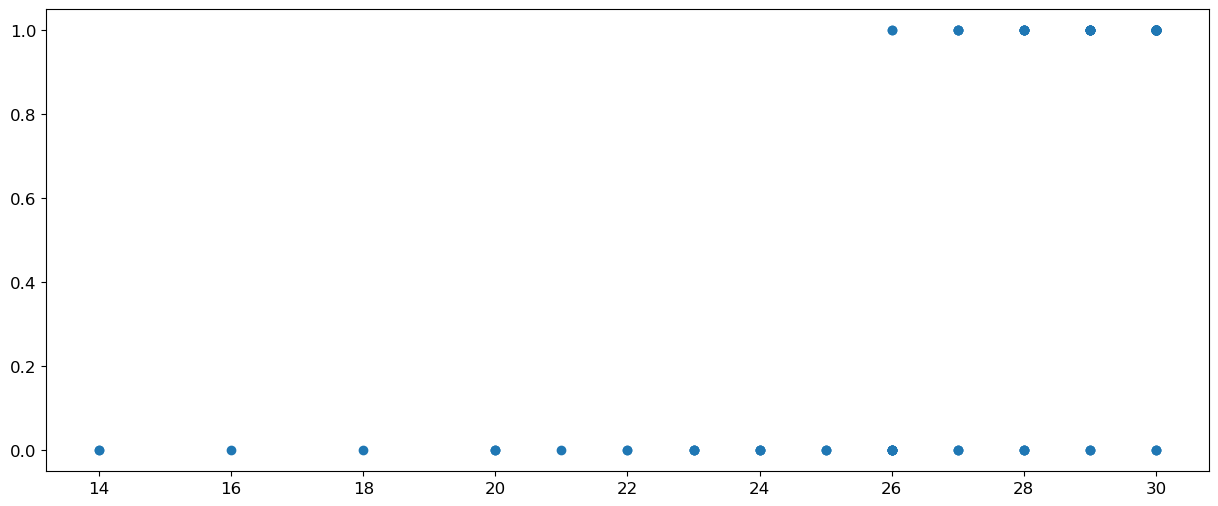

In [20]:
plt.scatter(X_test["total"],X_test["target"])

<Axes: xlabel='total'>

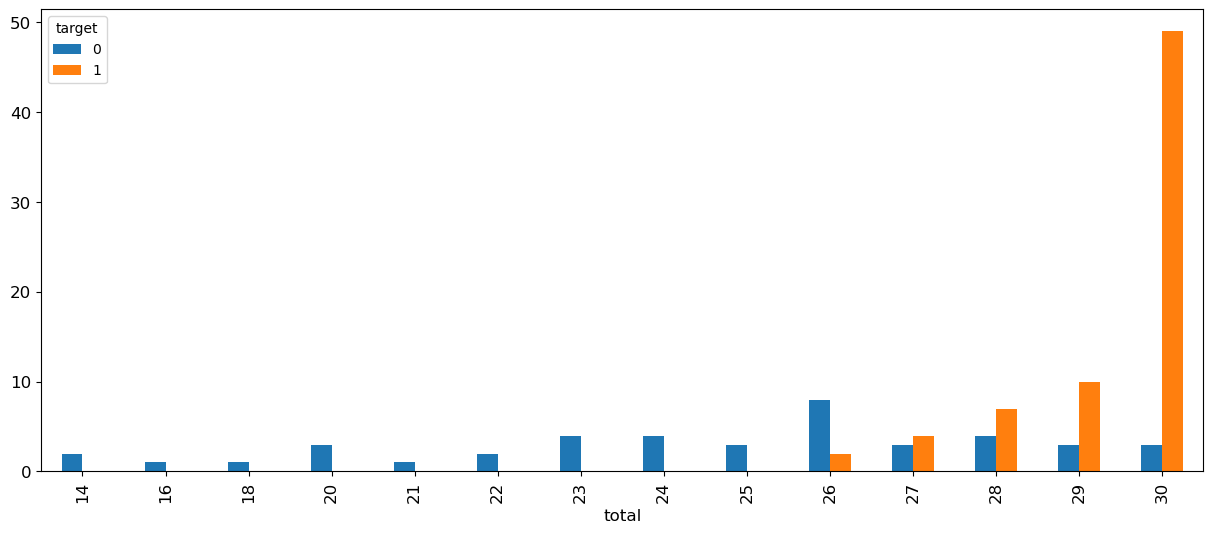

In [21]:
tmp_df = X_test.groupby(["total","target"]).agg({"target":"count"})
tmp_df.columns = ["count"]
tmp_df.reset_index(inplace=True)
tmp_df.pivot(index = "total",columns = "target",values = "count").plot(kind = "bar")
#tmp_df

In [22]:
accuarcy={}

for b in range(X_test.shape[1]):
    X_test["pred"] = X_test["total"]>=b
    accuarcy[b] = accuracy_score(X_test["target"],X_test["pred"])
    


In [23]:
accuarcy[27]

0.868421052631579